In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline


In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [4]:
data.shape

(2016, 8)

In [5]:
data['lot_size_units'] = data.apply(lambda row: row['lot_size'] * 43560 if row['lot_size_units'] == 'acre' else row['lot_size'], axis=1)

In [6]:
# convert size_units column to numeric
def convert_size_units(x):
    if x == 'sqft':
        return 1.0
    elif x == 'acre':
        return 43560.0 # 1 acre = 43,560 square feet
    else:
        return float('nan')

data['size_units'] = data['size_units'].map(convert_size_units)

In [7]:
#drop dups, null values
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
# df.drop(columns=['lot_size_units'], inplace=True)
data.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,1.0,6000.00,6000.0,98144,795000.0
1,4,2.0,2240.0,1.0,0.31,13503.6,98106,915000.0
2,4,3.0,2040.0,1.0,3783.00,3783.0,98107,950000.0
3,4,3.0,3800.0,1.0,5175.00,5175.0,98199,1950000.0
5,2,2.0,1190.0,1.0,1.00,43560.0,98107,740000.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1660 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            1660 non-null   int64  
 1   baths           1660 non-null   float64
 2   size            1660 non-null   float64
 3   size_units      1660 non-null   float64
 4   lot_size        1660 non-null   float64
 5   lot_size_units  1660 non-null   float64
 6   zip_code        1660 non-null   int64  
 7   price           1660 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 116.7 KB


In [9]:
for column in data.columns:
  print(data[column].value_counts())
  print("*"*20)
 

beds
3     621
2     406
4     395
5     123
1      81
6      22
9       5
7       3
8       2
15      1
14      1
Name: count, dtype: int64
********************
baths
2.0    516
1.0    298
2.5    266
3.0    193
3.5    166
1.5    121
4.0     37
4.5     21
5.0     16
5.5     13
6.0      5
7.0      4
8.5      1
0.5      1
9.0      1
6.5      1
Name: count, dtype: int64
********************
size
2080.0    12
1460.0    11
1580.0    10
2600.0    10
1350.0    10
          ..
1548.0     1
1174.0     1
2172.0     1
530.0      1
1482.0     1
Name: count, Length: 698, dtype: int64
********************
size_units
1.0    1660
Name: count, dtype: int64
********************
lot_size
5000.0    61
4000.0    45
6000.0    38
1.0       26
4800.0    16
          ..
856.0      1
1484.0     1
745.0      1
5043.0     1
4267.0     1
Name: count, Length: 959, dtype: int64
********************
lot_size_units
5000.0     61
4000.0     45
6000.0     38
43560.0    26
4800.0     16
           ..
856.0       1
1484.0

In [10]:
data.isna().sum()

beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64

In [11]:
data.describe()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
count,1660.000000,1660.000000,1660.000000,1660.0,1660.000000,1.660000e+03,1660.000000,1.660000e+03
mean,3.128916,2.296988,1897.614458,1.0,3887.620446,1.886929e+04,98124.354819,1.039419e+06
std,1.185204,1.009624,916.473152,0.0,2716.908657,2.888464e+05,22.918652,1.010520e+06
min,1.000000,0.500000,250.000000,1.0,0.230000,5.000000e+02,98101.000000,1.590000e+05
25%,2.000000,1.500000,1260.000000,1.0,1269.500000,2.796250e+03,98108.000000,6.800000e+05
50%,3.000000,2.000000,1720.000000,1.0,4000.000000,5.000000e+03,98117.000000,8.650000e+05
75%,4.000000,3.000000,2370.000000,1.0,6000.000000,7.359750e+03,98126.000000,1.180000e+06
max,15.000000,9.000000,11010.000000,1.0,9998.000000,1.089000e+07,98199.000000,2.500000e+07


In [12]:
#check for categorical variables
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 0
Integer variables: 0
Float variables: 6


In [13]:
#EDA Analysis 
#correlation independednt and dependent features
#check for multi corr
data.corr()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
beds,1.000000,0.593118,0.725982,NaN,0.286267,-0.069909,0.051972,0.234021
baths,0.593118,1.000000,0.620012,NaN,0.013293,-0.048328,-0.042707,0.271710
size,0.725982,0.620012,1.000000,NaN,0.268075,-0.060761,0.052203,0.402903
size_units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lot_size,0.286267,0.013293,0.268075,NaN,1.000000,-0.062405,0.173726,0.091087
lot_size_units,-0.069909,-0.048328,-0.060761,NaN,-0.062405,1.000000,-0.027353,-0.029150
zip_code,0.051972,-0.042707,0.052203,NaN,0.173726,-0.027353,1.000000,-0.062098
price,0.234021,0.271710,0.402903,NaN,0.091087,-0.029150,-0.062098,1.000000


<Axes: >

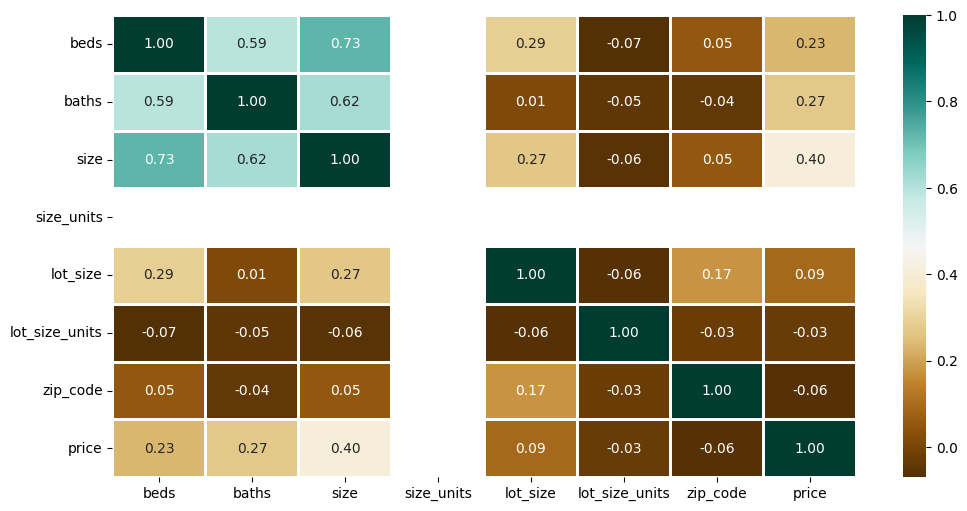

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
			cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True)

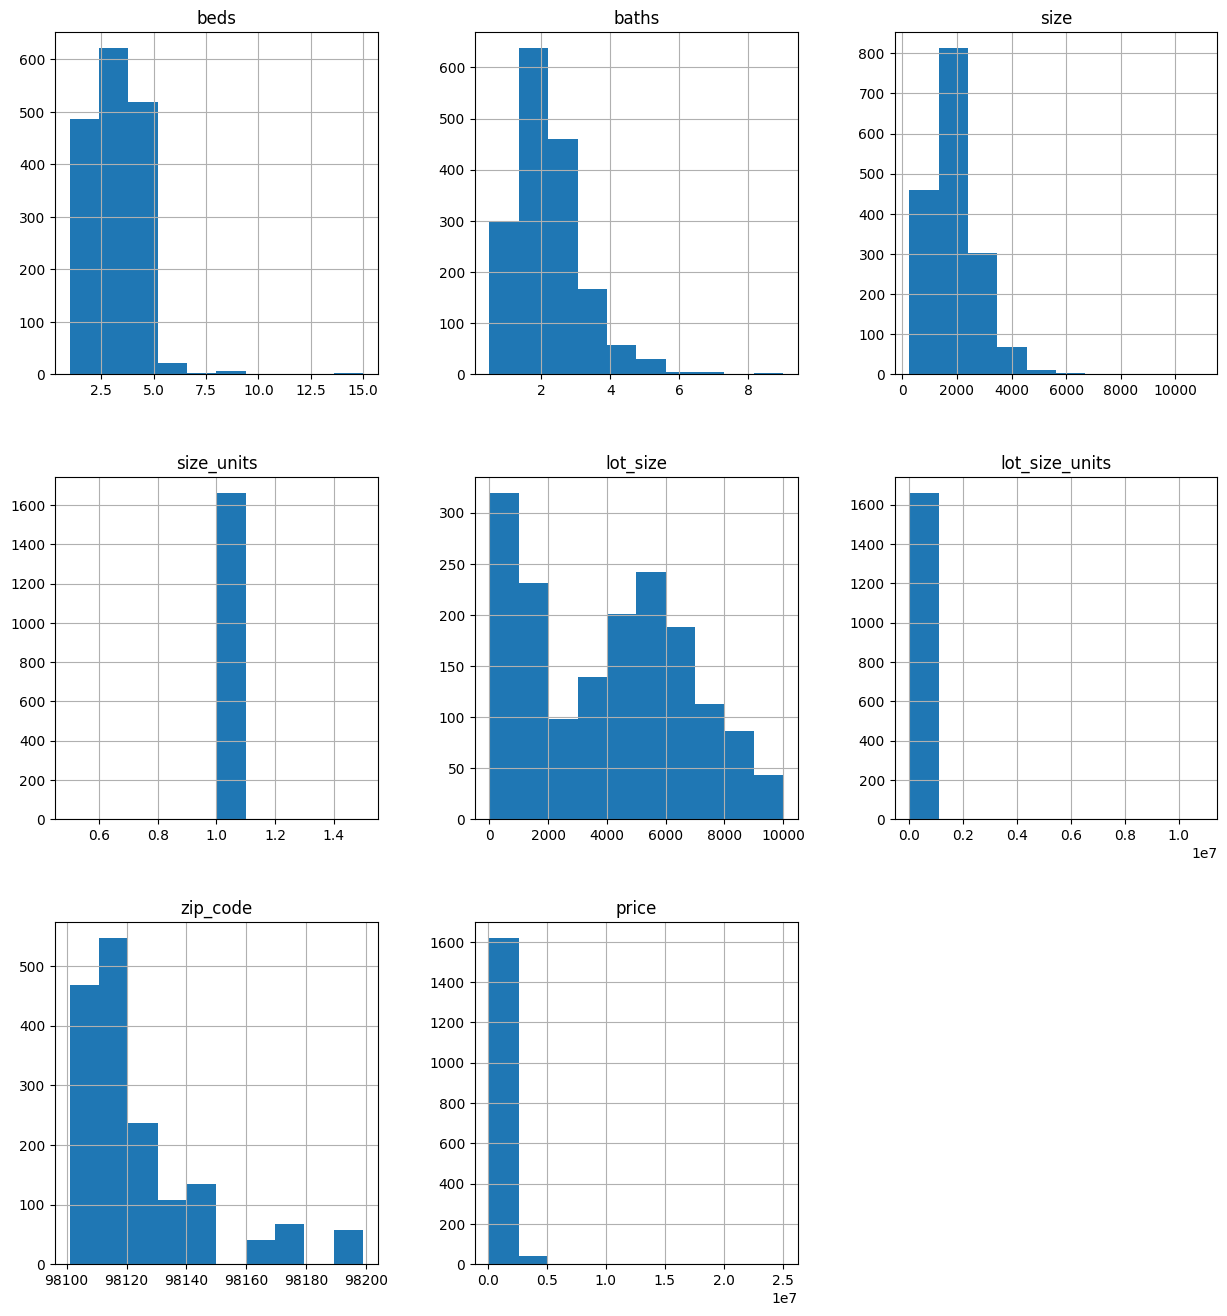

In [15]:
#hist will plot for all 
import matplotlib.pyplot as plt
data.hist(bins=10, figsize=(15,16))
plt.show()

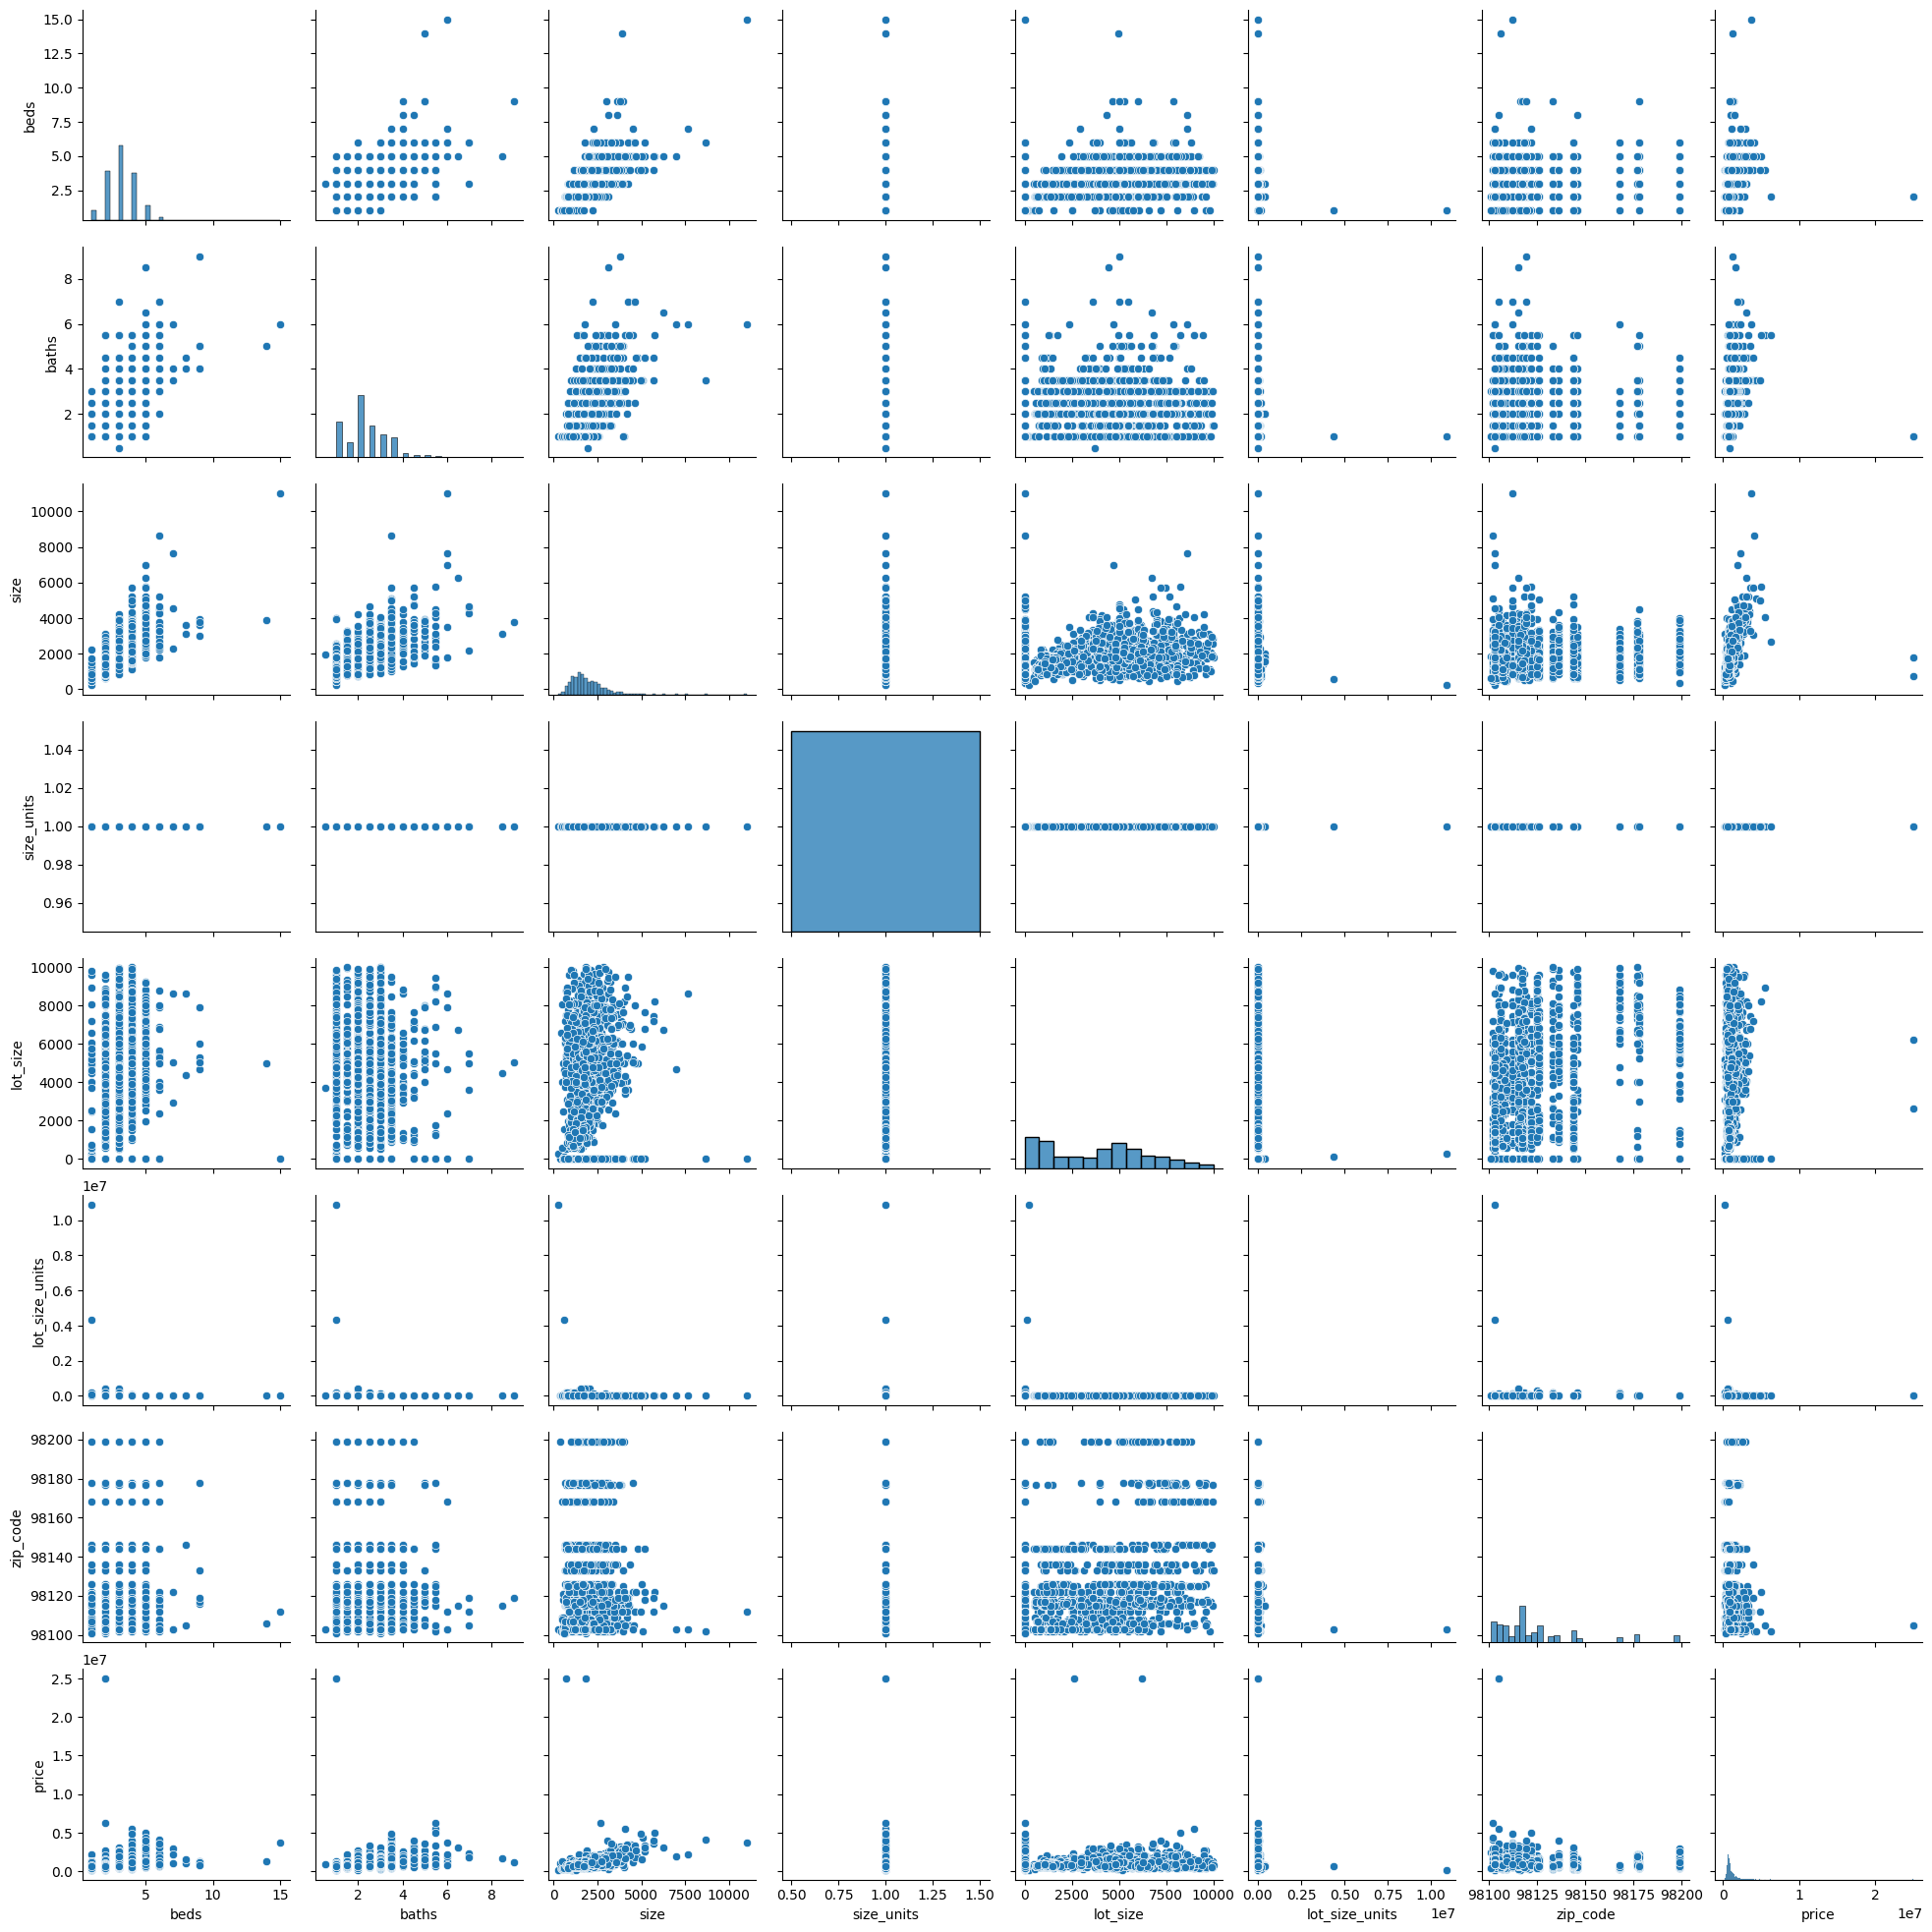

In [16]:
import seaborn as sns
sns.pairplot(data)

In [17]:
#prepare independent and dependent features dividing
X = data.iloc[:, :-1] # select all columns except the last one (price)

# select the target variable using iloc
Y = data.iloc[:, -1] 

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1660 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            1660 non-null   int64  
 1   baths           1660 non-null   float64
 2   size            1660 non-null   float64
 3   size_units      1660 non-null   float64
 4   lot_size        1660 non-null   float64
 5   lot_size_units  1660 non-null   float64
 6   zip_code        1660 non-null   int64  
 7   price           1660 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 116.7 KB


In [19]:
data['size_units']

0       1.0
1       1.0
2       1.0
3       1.0
5       1.0
       ... 
2009    1.0
2010    1.0
2011    1.0
2013    1.0
2015    1.0
Name: size_units, Length: 1660, dtype: float64

In [20]:
data['beds'].value_counts()

beds
3     621
2     406
4     395
5     123
1      81
6      22
9       5
7       3
8       2
15      1
14      1
Name: count, dtype: int64

In [21]:
data.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,1.0,6000.00,6000.0,98144,795000.0
1,4,2.0,2240.0,1.0,0.31,13503.6,98106,915000.0
2,4,3.0,2040.0,1.0,3783.00,3783.0,98107,950000.0
3,4,3.0,3800.0,1.0,5175.00,5175.0,98199,1950000.0
5,2,2.0,1190.0,1.0,1.00,43560.0,98107,740000.0


In [22]:
#prize per sq feet

In [23]:
data['price_per_sqft'] = data['price'] * 100000 / data['size']

In [24]:
data['price_per_sqft']

0       3.069498e+07
1       4.084821e+07
2       4.656863e+07
3       5.131579e+07
5       6.218487e+07
            ...     
2009    4.017857e+07
2010    4.999643e+07
2011    6.642336e+07
2013    5.373832e+07
2015    3.853801e+07
Name: price_per_sqft, Length: 1660, dtype: float64

In [25]:
data.describe()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,price_per_sqft
count,1660.000000,1660.000000,1660.000000,1660.0,1660.000000,1.660000e+03,1660.000000,1.660000e+03,1.660000e+03
mean,3.128916,2.296988,1897.614458,1.0,3887.620446,1.886929e+04,98124.354819,1.039419e+06,5.828904e+07
std,1.185204,1.009624,916.473152,0.0,2716.908657,2.888464e+05,22.918652,1.010520e+06,9.099298e+07
min,1.000000,0.500000,250.000000,1.0,0.230000,5.000000e+02,98101.000000,1.590000e+05,6.796117e+06
25%,2.000000,1.500000,1260.000000,1.0,1269.500000,2.796250e+03,98108.000000,6.800000e+05,4.337101e+07
50%,3.000000,2.000000,1720.000000,1.0,4000.000000,5.000000e+03,98117.000000,8.650000e+05,5.387001e+07
75%,4.000000,3.000000,2370.000000,1.0,6000.000000,7.359750e+03,98126.000000,1.180000e+06,6.437569e+07
max,15.000000,9.000000,11010.000000,1.0,9998.000000,1.089000e+07,98199.000000,2.500000e+07,3.424658e+09


In [26]:
data.shape

(1660, 9)

In [27]:
data

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,price_per_sqft
0,3,2.5,2590.0,1.0,6000.00,6000.0,98144,795000.0,3.069498e+07
1,4,2.0,2240.0,1.0,0.31,13503.6,98106,915000.0,4.084821e+07
2,4,3.0,2040.0,1.0,3783.00,3783.0,98107,950000.0,4.656863e+07
3,4,3.0,3800.0,1.0,5175.00,5175.0,98199,1950000.0,5.131579e+07
5,2,2.0,1190.0,1.0,1.00,43560.0,98107,740000.0,6.218487e+07
...,...,...,...,...,...,...,...,...,...
2009,3,3.5,1680.0,1.0,1486.00,1486.0,98126,675000.0,4.017857e+07
2010,2,2.0,1400.0,1.0,0.34,14810.4,98199,699950.0,4.999643e+07
2011,3,2.0,1370.0,1.0,0.50,21780.0,98112,910000.0,6.642336e+07
2013,4,2.0,2140.0,1.0,6250.00,6250.0,98199,1150000.0,5.373832e+07


In [28]:
data.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,price_per_sqft
0,3,2.5,2590.0,1.0,6000.00,6000.0,98144,795000.0,3.069498e+07
1,4,2.0,2240.0,1.0,0.31,13503.6,98106,915000.0,4.084821e+07
2,4,3.0,2040.0,1.0,3783.00,3783.0,98107,950000.0,4.656863e+07
3,4,3.0,3800.0,1.0,5175.00,5175.0,98199,1950000.0,5.131579e+07
5,2,2.0,1190.0,1.0,1.00,43560.0,98107,740000.0,6.218487e+07


In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [30]:
model.fit(X,Y)

LinearRegression()

In [31]:
new_house = [[3, 2.5, 2590.0, 1.0,6000.00, 6000.0, 98144]]
predicted_price = model.predict(new_house)

print("Predicted price:", predicted_price[0])

Predicted price: 1371588.4944635034


C:\Users\gatra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
data.to_csv("final_dataset.csv")

In [33]:
x=data.drop(columns=['price'])
y=data['price']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [36]:
print(y_train.shape)

(1328,)


In [37]:
#Applying Linear Regression

In [38]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False), ['beds']), remainder='passthrough')

In [39]:
scaler = StandardScaler()

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

lr = LinearRegression()
lr.fit(x_scaled, y)

LinearRegression()

In [44]:
pipe = make_pipeline(column_trans,scaler, lr)

In [45]:
pipe.fit(x_train,y_train)

C:\Users\gatra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['beds'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [46]:
y_pred_lr = pipe.predict(x_test)

In [47]:
r2_score(y_test,y_pred_lr)

0.8101190328641297

In [48]:
#using lasso

In [49]:
lasso = Lasso()

In [50]:
pipe = make_pipeline(column_trans,scaler, lasso)

In [51]:
pipe.fit(x_train,y_train)

C:\Users\gatra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['beds'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [52]:
y_pred_ridge = pipe.predict(x_test)
r2_score(y_test,y_pred_ridge)

0.8101120798872699

In [53]:
print("no Regularization: ", r2_score(y_test,y_pred_lr))
print("Ridge: ", r2_score(y_test,y_pred_ridge))

no Regularization:  0.8101190328641297
Ridge:  0.8101120798872699


In [54]:
import pickle

In [55]:
pickle.dump(pipe, open('RidgeModel.pkl','wb'))